In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')
google_drive_path = '/content/drive/My Drive/Colab_Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_path = os.path.join(google_drive_path, "learning_from_images", "project", "data")
segmentation_path = os.path.join(root_path, "DeepFashion", 'In-shop Clothes Retrieval Benchmark', "Anno", "segmentation")

In [4]:
dict_gallery = {}

In [5]:
deepfashion_segmentation_gallery_path = os.path.join(segmentation_path, "DeepFashion_segmentation_gallery.json")
with open(deepfashion_segmentation_gallery_path, "r") as fp:
    dict_gallery = json.load(fp)

In [6]:
image_ids = []
image_heights = []
image_widths = []
image_file_names = []

annotation_ids = []
annotation_segmentations = []
annotation_areas = []
annotation_image_ids = []
annotation_bbox_x1 = []
annotation_bbox_y1 = []
annotation_bbox_x2 = []
annotation_bbox_y2 = []
aannotation_category_ids = []

segmentation_ids = []
segmentation_value = []
seg_annotation_ids = []

In [7]:
for image in dict_gallery["images"]:
  image_ids.append(image["id"])
  image_heights.append(image["height"])
  image_widths.append(image["width"])
  image_file_names.append(image["file_name"])

In [8]:
for annotation in dict_gallery["annotations"]:
  anno_id = int(annotation["id"])
  annotation_ids.append(anno_id)
  #for seg in annotation["segmentation"]: 
  #  for seg_part in seg:
  #    annotation_segmentations.append([seg_part, anno_id])  
  annotation_areas.append(annotation["area"])
  annotation_image_ids.append(annotation["image_id"])
  annotation_bbox_x1.append(annotation["bbox"][0])
  annotation_bbox_y1.append(annotation["bbox"][1])
  annotation_bbox_x2.append(annotation["bbox"][2])
  annotation_bbox_y2.append(annotation["bbox"][3])
  aannotation_category_ids.append(annotation["category_id"])

In [9]:
#segmentation_arr_length = len(annotation_segmentations) 

#for indx in np.arange(segmentation_arr_length):
#  segmentation_ids.append(indx + 1)
#  segmentation_value.append(annotation_segmentations[indx][0])
#  seg_annotation_ids.append(annotation_segmentations[indx][1])

In [10]:
df_images = pd.DataFrame({
    "id": image_ids,
    "height": image_heights,
    "width": image_widths,
    "file_name": image_file_names
})

df_images.shape

(3810, 4)

In [11]:
df_images.head(6)

,id,height,width,file_name
0,00006424041,1101,750,img_highres/MEN/Tees_Tanks/id_00006424/04_1_fr...
1,00004750012,1101,750,img_highres/MEN/Tees_Tanks/id_00004750/01_2_si...
2,00000873021,1101,750,img_highres/WOMEN/Dresses/id_00000873/02_1_fro...
3,00003276062,1101,750,img_highres/WOMEN/Dresses/id_00003276/06_2_sid...
4,00003283021,1101,750,img_highres/WOMEN/Dresses/id_00003283/02_1_fro...
5,00001217031,1101,750,img_highres/WOMEN/Blouses_Shirts/id_00001217/0...


In [12]:
df_annotations = pd.DataFrame({
    "id": annotation_ids,
    "image_id": annotation_image_ids,
    "category_id": aannotation_category_ids,
    "area": annotation_areas,
    "bbox_x1": annotation_bbox_x1,
    "bbox_y1": annotation_bbox_y1,
    "bbox_x2": annotation_bbox_x2,
    "bbox_y2": annotation_bbox_y2,
})  

df_annotations.shape

(11042, 8)

In [13]:
df_annotations.head(6)

,id,image_id,category_id,area,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,1,00006424041,1,292116,56.0,247.0,573.0,755.0
1,2,00006424041,6,40099,121.0,956.0,389.0,145.0
2,3,00004750012,1,183860,201.0,114.0,411.0,709.0
3,4,00004750012,6,87192,182.0,804.0,327.0,297.0
4,5,00004750012,8,2797,324.0,736.0,67.0,75.0
5,6,00000873021,4,144007,214.0,256.0,296.0,678.0


In [14]:
#df_segmentations = pd.DataFrame({
#    "id": segmentation_ids,
#    "annotation_id": seg_annotation_ids,
#    "value": segmentation_value
#})

#df_segmentations.shape

In [15]:
#df_segmentations.head(6)

In [16]:
#clothes_segmentation_category = [1, 2, 3, 4, 5, 6]
clothes_segmentation_category = [1]
df_clothes_annotations = pd.concat([df_annotations[df_annotations["category_id"] == category_id] for category_id in clothes_segmentation_category])
df_clothes_annotations.shape

(3339, 8)

In [17]:
df_clothes_annotations.head(6)

,id,image_id,category_id,area,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,1,00006424041,1,292116,56.0,247.0,573.0,755.0
2,3,00004750012,1,183860,201.0,114.0,411.0,709.0
13,14,00001217031,1,124681,178.0,302.0,331.0,565.0
16,17,00004638091,1,410765,39.0,105.0,657.0,852.0
19,20,00002439013,1,107642,57.0,112.0,653.0,829.0
22,23,00005820021,1,165503,154.0,290.0,494.0,505.0


In [18]:
#df_segmented_part = df_segmentations[df_segmentations["annotation_id"] == df_clothes_annotations[df_clothes_annotations["image_id"] == df_images.loc[0, "id"]].loc[0, "id"]]

In [19]:
#segmented_values = df_segmented_part["value"]#.to_numpy()
#segmented_values.describe()

In [20]:
#df_clothes_annotations[df_clothes_annotations["category_id"] == 1].iloc[0]["image_id"]

In [21]:
#df_images[df_images["id"] == df_clothes_annotations[df_clothes_annotations["category_id"] == 1].iloc[0]["image_id"]]

In [22]:
df_clothes_category_top = df_clothes_annotations.set_index('image_id').join(df_images.set_index('id'))
df_clothes_category_top.head(6)

,id,category_id,area,bbox_x1,bbox_y1,bbox_x2,bbox_y2,height,width,file_name
image_id,,,,,,,,,,
00006424041,1,1,292116,56.0,247.0,573.0,755.0,1101,750,img_highres/MEN/Tees_Tanks/id_00006424/04_1_fr...
00004750012,3,1,183860,201.0,114.0,411.0,709.0,1101,750,img_highres/MEN/Tees_Tanks/id_00004750/01_2_si...
00001217031,14,1,124681,178.0,302.0,331.0,565.0,1101,750,img_highres/WOMEN/Blouses_Shirts/id_00001217/0...
00004638091,17,1,410765,39.0,105.0,657.0,852.0,1101,750,img_highres/MEN/Sweaters/id_00004638/09_1_fron...
00002439013,20,1,107642,57.0,112.0,653.0,829.0,1101,750,img_highres/MEN/Jackets_Vests/id_00002439/01_3...
00005820021,23,1,165503,154.0,290.0,494.0,505.0,1101,750,img_highres/WOMEN/Tees_Tanks/id_00005820/02_1_...


In [23]:
df_clothes_category_top.dtypes

id               int64
category_id      int64
area             int64
bbox_x1        float64
bbox_y1        float64
bbox_x2        float64
bbox_y2        float64
height           int64
width            int64
file_name       object
dtype: object

In [24]:
df_clothes_category_top.shape

(3339, 10)

In [25]:
df_clothes_category_top["file_name"].sample(frac=0.1)

image_id
00002343031    img_highres/WOMEN/Blouses_Shirts/id_00002343/0...
00005568021    img_highres/WOMEN/Blouses_Shirts/id_00005568/0...
00002366011    img_highres/WOMEN/Blouses_Shirts/id_00002366/0...
00002585031    img_highres/WOMEN/Blouses_Shirts/id_00002585/0...
00006845011    img_highres/WOMEN/Cardigans/id_00006845/01_1_f...
                                     ...                        
00002574021    img_highres/WOMEN/Tees_Tanks/id_00002574/02_1_...
00006602052    img_highres/WOMEN/Tees_Tanks/id_00006602/05_2_...
00000573092    img_highres/WOMEN/Tees_Tanks/id_00000573/09_2_...
00002121051    img_highres/WOMEN/Cardigans/id_00002121/05_1_f...
00006602112    img_highres/WOMEN/Tees_Tanks/id_00006602/11_2_...
Name: file_name, Length: 334, dtype: object

In [26]:
img_path = os.path.join(root_path, "deep_fashion", 'in_shop_clothes_retrieval_benchmark', "anno", "segmentation", "img_highres_seg")
# todo unique based on data
segmented_img_paths = df_clothes_category_top["file_name"].sample(frac=0.1)
segmented_img_paths = [os.path.join(img_path, segmented_img_path) for segmented_img_path in segmented_img_paths]

In [27]:
exists_path = []
not_exists_path = []
for file_path in segmented_img_paths: 
  if os.path.isfile(file_path):
      exists_path.append(file_path)
  else:
      not_exists_path.append(file_path)

In [28]:
len(exists_path)

227

In [29]:
len(not_exists_path)

107

In [30]:
segmented_img_paths = exists_path
images_arr = [cv2.imread(img_path, cv2.IMREAD_COLOR) for img_path in segmented_img_paths]
len(images_arr)

227

In [31]:
os.path.join(img_path, segmented_img_paths[0])

'/content/drive/My Drive/Colab_Notebooks/learning_from_images/project/data/deep_fashion/in_shop_clothes_retrieval_benchmark/anno/segmentation/img_highres_seg/img_highres/WOMEN/Blouses_Shirts/id_00000774/04_2_side.jpg'

In [32]:
images_arr[0].shape

(1101, 750, 3)

In [33]:
segmented_img_paths = [segmented_img_path.replace(".jpg", "_segment.png") for segmented_img_path in segmented_img_paths]
segmented_images_arr = [cv2.imread(img_path, cv2.IMREAD_COLOR) for img_path in segmented_img_paths]
len(segmented_images_arr)

227

In [34]:
os.path.join(img_path, segmented_img_paths[0])

'/content/drive/My Drive/Colab_Notebooks/learning_from_images/project/data/deep_fashion/in_shop_clothes_retrieval_benchmark/anno/segmentation/img_highres_seg/img_highres/WOMEN/Blouses_Shirts/id_00000774/04_2_side_segment.png'

In [35]:
segmented_images_arr[0].shape

(1101, 750, 3)

In [47]:
def crop_segmented_part_from_image(segment_img, img):
  # upper body clothes => top => color(r-g-b) => 255-250-250
  red_values = segment_img[:, :, 2]
  filtered_red_values = np.where(red_values == 255, img[:, :, 2], 0)

  green_values = segment_img[:, :, 1]
  filtered_green_values = np.where(green_values == 250, img[:, :, 1], 0)

  blue_values = segment_img[:, :, 0]
  filtered_blue_values = np.where(blue_values == 250, img[:, :, 0], 0)

  croped_img = np.zeros(img.shape, dtype=np.float64)
  croped_img[:, :, 0] = filtered_blue_values
  croped_img[:, :, 1] = filtered_green_values
  croped_img[:, :, 2] = filtered_red_values

  return croped_img

In [37]:
arr_size = len(images_arr)
croped_imgs = [crop_segmented_part_from_image(segmented_images_arr[i], images_arr[i]) for i in np.arange(arr_size)]
len(croped_imgs)

227

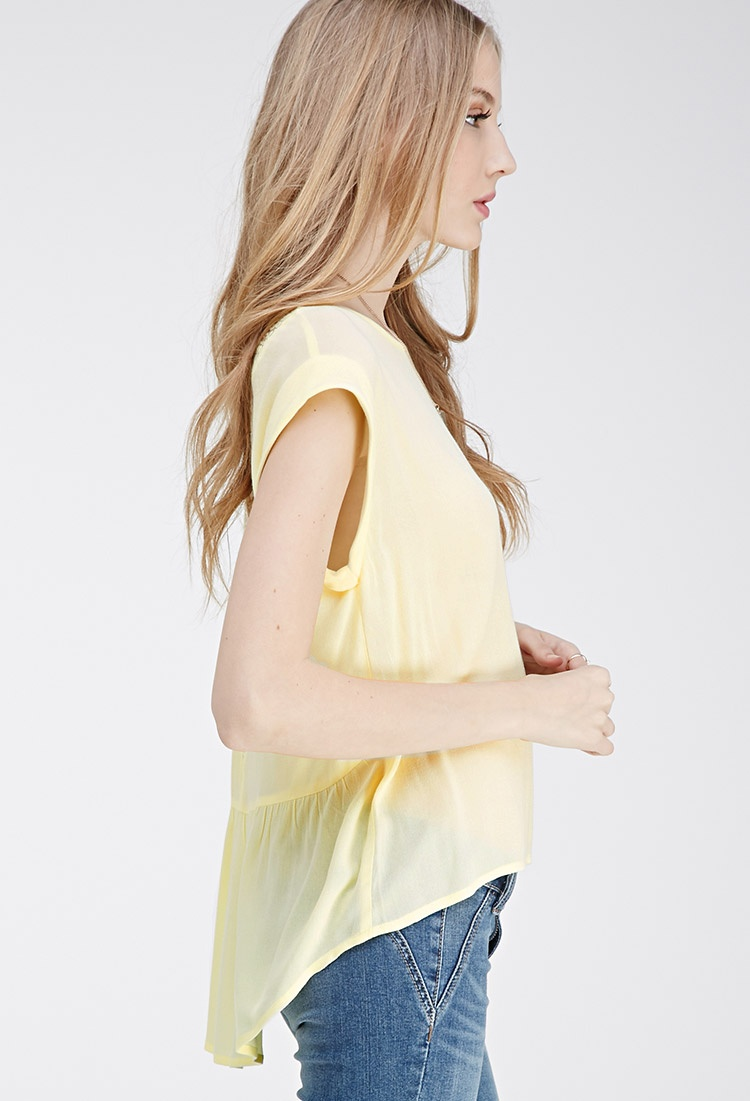

In [49]:
from google.colab.patches import cv2_imshow
cv2_imshow(images_arr[14])

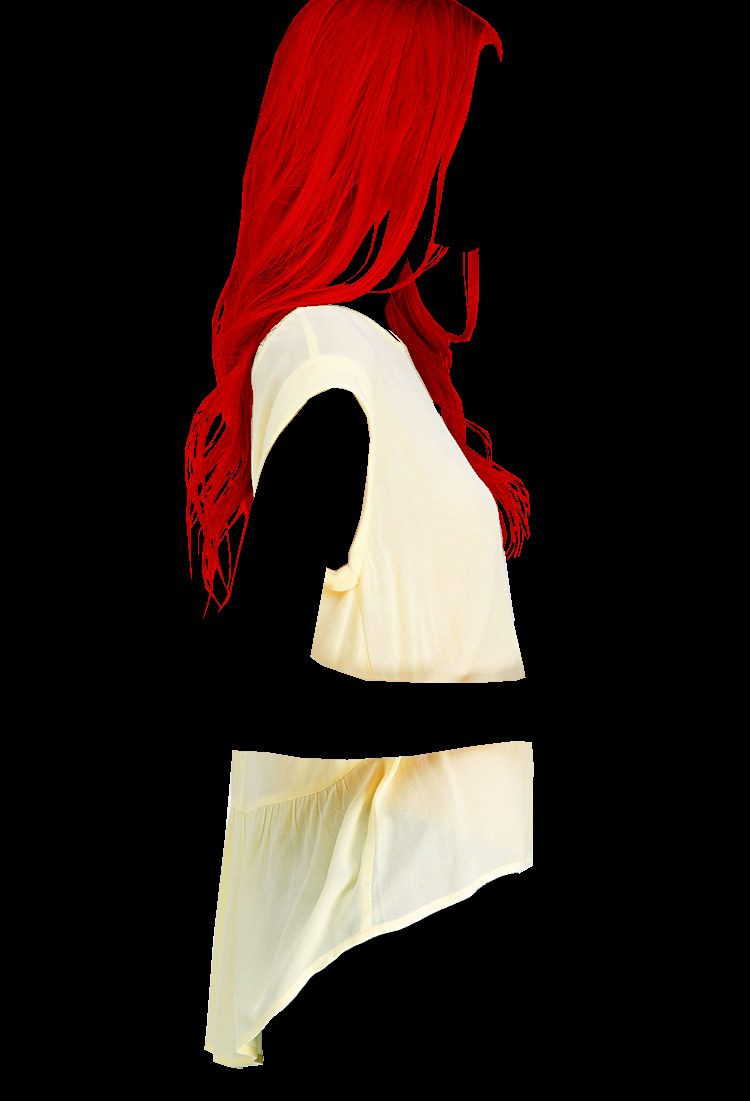

In [50]:
from google.colab.patches import cv2_imshow
cv2_imshow(croped_imgs[14])

In [45]:
"done"

'done'